In [41]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import nltk

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import snowballstemmer
from sklearn import metrics

import ast
from io import StringIO

In [2]:
#import dataset to juypter notebook and store it into a pandas dataframe:
twitterdataset = pd.read_csv('twitter.csv',encoding='latin-1')
twitterdataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
#now we need to add columns to our dataset, as seen above there are no column names:
twitterdataset.columns = ["target", "id", "date", "flag", "user", "text"]

In [4]:
#now print out dataset:
twitterdataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
#drop the columns we do not need, we only need target and the actual text of the 
twitterdataset.drop(columns=['id', 'date', 'flag', 'user' ])

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
#turn it into a binary problem, we only want postive or negative tweets. So that is if the value is 4 or 0
find_postive_data = twitterdataset[twitterdataset.target==4]
find_negative_data = twitterdataset[twitterdataset.target==0]

find_postive_data.drop(columns=['id', 'date', 'flag', 'user' ], axis = 1, inplace= True)
find_negative_data.drop(columns=['id', 'date', 'flag', 'user' ],axis = 1, inplace= True)




/var/folders/6k/htbjx7l93ldb6p54pmscffxh0000gn/T/ipykernel_1021/1520854249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  find_postive_data.drop(columns=['id', 'date', 'flag', 'user' ], axis = 1, inplace= True)
/var/folders/6k/htbjx7l93ldb6p54pmscffxh0000gn/T/ipykernel_1021/1520854249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  find_negative_data.drop(columns=['id', 'date', 'flag', 'user' ],axis = 1, inplace= True)


In [7]:
find_postive_data.head()

,target,text
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone


In [8]:
find_negative_data.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [9]:
#now we want to put the negative and positive tweets together:
add_set = [find_postive_data,find_negative_data]
binary_twitter_set = pd.concat(add_set)

In [123]:
binary_twitter_set.tail()

,target,text
799994,0,sick spend day lay bed listen
799995,0,gmail down
799996,0,rest peac farrah sad
799997,0,sound like rival flag ad much though
799998,0,resit exam summer wish work harder first year uni


In [11]:
#first lets convert dataset to lowercase, the text portion of the dataset:
binary_twitter_set['text'] = binary_twitter_set['text'].str.lower()
binary_twitter_set.tail()


,target,text
799994,0,sick spending my day laying in bed listening ...
799995,0,gmail is down?
799996,0,rest in peace farrah! so sad
799997,0,@eric_urbane sounds like a rival is flagging y...
799998,0,has to resit exams over summer... wishes he w...


In [12]:
#cleaning stop words:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kartiksharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kartiksharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#cleaning stop words:
stopwords = set(stopwords.words('english'))
def clean_stopwords(text):
    returnText = ''
    for word in str(text).split():
        if(word not in stopwords):
            returnText = returnText +" "+ word
    
    return returnText


binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda x: clean_stopwords(x))

In [14]:
binary_twitter_set

,target,text
799999,4,love @health4uandpets u guys r best!!
800000,4,im meeting one besties tonight! cant wait!! -...
800001,4,"@darealsunisakim thanks twitter add, sunisa! ..."
800002,4,sick really cheap hurts much eat real food pl...
800003,4,@lovesbrooklyn2 effect everyone
...,...,...
799994,0,sick spending day laying bed listening @taylo...
799995,0,gmail down?
799996,0,rest peace farrah! sad
799997,0,@eric_urbane sounds like rival flagging ads. ...


In [15]:
#cleaning usernames:

def remove_user_names(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub('@[^\s]+'," ",text) #REGEX from stackoverflow
    return subsitution

binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: remove_user_names(text))

In [16]:
binary_twitter_set

,target,text
799999,4,love u guys r best!!
800000,4,im meeting one besties tonight! cant wait!! -...
800001,4,"thanks twitter add, sunisa! got meet hin sh..."
800002,4,sick really cheap hurts much eat real food pl...
800003,4,effect everyone
...,...,...
799994,0,sick spending day laying bed listening
799995,0,gmail down?
799996,0,rest peace farrah! sad
799997,0,sounds like rival flagging ads. much though


In [17]:
#removing urls from tweets:
def remove_url(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub('r"((https|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)"'," ",text) #REGEX from stackoverflow
    return subsitution

binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: remove_url(text))

In [18]:
def remove_url_again(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub(r"http\S+","",text) #REGEX from stackoverflow
    return subsitution

binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: remove_url_again(text))

In [19]:
#remove anything that is not an alphabet:
def remove_non_alphabet(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub("[^a-zA-Z0-9]"," ",text) #REGEX from stackoverflow
    return subsitution

binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: remove_non_alphabet(text))

In [20]:
#We need tokenize first:

binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: word_tokenize(text))


In [21]:
binary_twitter_set

,target,text
799999,4,"[love, u, guys, r, best]"
800000,4,"[im, meeting, one, besties, tonight, cant, wai..."
800001,4,"[thanks, twitter, add, sunisa, got, meet, hin,..."
800002,4,"[sick, really, cheap, hurts, much, eat, real, ..."
800003,4,"[effect, everyone]"
...,...,...
799994,0,"[sick, spending, day, laying, bed, listening]"
799995,0,"[gmail, down]"
799996,0,"[rest, peace, farrah, sad]"
799997,0,"[sounds, like, rival, flagging, ads, much, tho..."


In [22]:
#stemming:
def stemming(text):
    returnArray= []
    for word in text:
        returnArray.append( nltk.stem.snowball.SnowballStemmer(language='english').stem(word))
    return returnArray

binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: stemming(text))


In [23]:
binary_twitter_set

,target,text
799999,4,"[love, u, guy, r, best]"
800000,4,"[im, meet, one, besti, tonight, cant, wait, gi..."
800001,4,"[thank, twitter, add, sunisa, got, meet, hin, ..."
800002,4,"[sick, realli, cheap, hurt, much, eat, real, f..."
800003,4,"[effect, everyon]"
...,...,...
799994,0,"[sick, spend, day, lay, bed, listen]"
799995,0,"[gmail, down]"
799996,0,"[rest, peac, farrah, sad]"
799997,0,"[sound, like, rival, flag, ad, much, though]"


In [24]:
def lemmer(text):
    lemmi = WordNetLemmatizer()
    returnArray= []
    for word in text:
        returnArray.append(lemmi.lemmatize(word))
    return returnArray


binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: lemmer(text))

In [25]:
#turn the array of words back in to sentences:
binary_twitter_set['text'] = binary_twitter_set['text'].apply(lambda text: ' '.join(text))
binary_twitter_set

,target,text
799999,4,love u guy r best
800000,4,im meet one besti tonight cant wait girl talk
800001,4,thank twitter add sunisa got meet hin show dc ...
800002,4,sick realli cheap hurt much eat real food plus...
800003,4,effect everyon
...,...,...
799994,0,sick spend day lay bed listen
799995,0,gmail down
799996,0,rest peac farrah sad
799997,0,sound like rival flag ad much though


In [26]:
#set our y and X values of the pandas dataframe now that we are done cleaning the dataset:
y_labels = binary_twitter_set.target
X_text = binary_twitter_set.text

In [27]:
X_text

799999                                    love u guy r best
800000        im meet one besti tonight cant wait girl talk
800001    thank twitter add sunisa got meet hin show dc ...
800002    sick realli cheap hurt much eat real food plus...
800003                                       effect everyon
                                ...                        
799994                        sick spend day lay bed listen
799995                                           gmail down
799996                                 rest peac farrah sad
799997                 sound like rival flag ad much though
799998    resit exam summer wish work harder first year uni
Name: text, Length: 1599999, dtype: object

In [150]:
#split xtrain,xtest...
X_train, X_test, y_train, y_test = train_test_split(X_text,y_labels,test_size = 0.05, random_state =42)

## TFIDF:

In [29]:
#term frequency using Tfidvectorizer:
vector = TfidfVectorizer(ngram_range=(1,2))
vector.fit(X_train)


3679709


In [30]:
newX_train = vector.transform(X_train)
newX_test = vector.transform(X_test)

## Logistic Regression Analysis:

In [31]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(newX_train, y_train)
y_pred = LRmodel.predict(newX_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     40001
           4       0.79      0.80      0.80     39999

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



<AxesSubplot:>

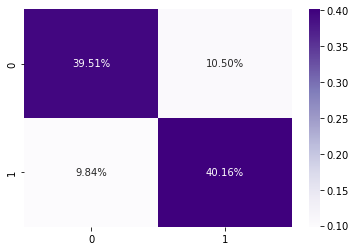

In [50]:
cmatrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap((cmatrix/np.sum(cmatrix)), annot=True, 
            fmt='.2%', cmap='Purples')

## KNN Analysis:

In [37]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [38]:
model = knn.fit(newX_train,y_train)

In [39]:
lbl_pred = knn.predict(newX_test)

In [40]:
print(classification_report(y_test, lbl_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.57     40001
           4       0.58      0.62      0.60     39999

    accuracy                           0.59     80000
   macro avg       0.59      0.59      0.59     80000
weighted avg       0.59      0.59      0.59     80000



<AxesSubplot:>

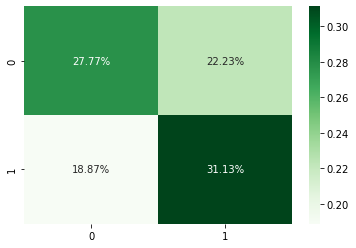

In [53]:
cmatrix = metrics.confusion_matrix(y_test, lbl_pred)
sns.heatmap((cmatrix/np.sum(cmatrix)), annot=True, 
            fmt='.2%', cmap='Greens')

## Now that we have done our analysis on twitter dataset, lets use another datset and see how well our fitted model predicts on the new dataset:

In [112]:
#import amazon dataset to juypter notebook and store it into a pandas dataframe:

AmazonDataset = pd.read_csv('Amazon_Reviews.csv',encoding='latin-1')
AmazonDataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [113]:
#turn it into a binary problem, we only want postive or negative amazon tweets. So that is if the value is 1 or 5
AmazonDataset_find_postive_data = AmazonDataset[AmazonDataset.Score==5]
AmazonDataset_find_negative_data = AmazonDataset[AmazonDataset.Score==1]

AmazonDataset_find_postive_data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary' ], axis = 1, inplace= True)
AmazonDataset_find_negative_data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary' ], inplace= True)




/var/folders/6k/htbjx7l93ldb6p54pmscffxh0000gn/T/ipykernel_1021/1582575857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AmazonDataset_find_postive_data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary' ], axis = 1, inplace= True)
/var/folders/6k/htbjx7l93ldb6p54pmscffxh0000gn/T/ipykernel_1021/1582575857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AmazonDataset_find_negative_data.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary' ], inplace= True)


In [114]:
AmazonDataset_find_postive_data.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
4,5,Great taffy at a great price. There was a wid...
6,5,This saltwater taffy had great flavors and was...
7,5,This taffy is so good. It is very soft and ch...
8,5,Right now I'm mostly just sprouting this so my...


In [115]:
AmazonDataset_find_negative_data.head()

,Score,Text
1,1,Product arrived labeled as Jumbo Salted Peanut...
12,1,My cats have been happily eating Felidae Plati...
26,1,"The candy is just red , No flavor . Just plan..."
50,1,"This oatmeal is not good. Its mushy, soft, I d..."
62,1,Arrived in 6 days and were so stale i could no...


In [116]:
#Replace 1 scores to 0 NEGATIVE:

AmazonDataset_find_negative_data['Score'] = AmazonDataset_find_negative_data['Score'].replace(1, 0)

/var/folders/6k/htbjx7l93ldb6p54pmscffxh0000gn/T/ipykernel_1021/4212388478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AmazonDataset_find_negative_data['Score'] = AmazonDataset_find_negative_data['Score'].replace(1, 0)


In [117]:
AmazonDataset_find_negative_data

,Score,Text
1,0,Product arrived labeled as Jumbo Salted Peanut...
12,0,My cats have been happily eating Felidae Plati...
26,0,"The candy is just red , No flavor . Just plan..."
50,0,"This oatmeal is not good. Its mushy, soft, I d..."
62,0,Arrived in 6 days and were so stale i could no...
...,...,...
568402,0,"I was disappointed in this product, as I had r..."
568426,0,"The candy is tasty, but they totally scam you ..."
568431,0,Definitely not worth buying flavored water wit...
568432,0,I thought this soup would be more like a chill...


In [118]:
#Replace 5 scores to 4 Positive:
AmazonDataset_find_postive_data['Score'] = AmazonDataset_find_postive_data['Score'].replace(5, 4)

/var/folders/6k/htbjx7l93ldb6p54pmscffxh0000gn/T/ipykernel_1021/83557705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AmazonDataset_find_postive_data['Score'] = AmazonDataset_find_postive_data['Score'].replace(5, 4)


In [119]:
AmazonDataset_find_postive_data

,Score,Text
0,4,I have bought several of the Vitality canned d...
4,4,Great taffy at a great price. There was a wid...
6,4,This saltwater taffy had great flavors and was...
7,4,This taffy is so good. It is very soft and ch...
8,4,Right now I'm mostly just sprouting this so my...
...,...,...
568448,4,My only complaint is that there's so much of i...
568449,4,Great for sesame chicken..this is a good if no...
568451,4,"These stars are small, so you can give 10-15 o..."
568452,4,These are the BEST treats for training and rew...


In [120]:
#now we want to put the negative and positive tweets together:
new_add_set = [AmazonDataset_find_postive_data,AmazonDataset_find_negative_data]
binary_amazon_reviews_set = pd.concat(new_add_set)

In [121]:
binary_amazon_reviews_set

,Score,Text
0,4,I have bought several of the Vitality canned d...
4,4,Great taffy at a great price. There was a wid...
6,4,This saltwater taffy had great flavors and was...
7,4,This taffy is so good. It is very soft and ch...
8,4,Right now I'm mostly just sprouting this so my...
...,...,...
568402,0,"I was disappointed in this product, as I had r..."
568426,0,"The candy is tasty, but they totally scam you ..."
568431,0,Definitely not worth buying flavored water wit...
568432,0,I thought this soup would be more like a chill...


In [124]:
#first lets convert dataset to lowercase, the text portion of the dataset:
binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].str.lower()
binary_amazon_reviews_set

,Score,Text
0,4,i have bought several of the vitality canned d...
4,4,great taffy at a great price. there was a wid...
6,4,this saltwater taffy had great flavors and was...
7,4,this taffy is so good. it is very soft and ch...
8,4,right now i'm mostly just sprouting this so my...
...,...,...
568402,0,"i was disappointed in this product, as i had r..."
568426,0,"the candy is tasty, but they totally scam you ..."
568431,0,definitely not worth buying flavored water wit...
568432,0,i thought this soup would be more like a chill...


In [126]:
#cleaning stop words:
#cleaning stop words:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
def clean_stopwords(text):
    returnText = ''
    for word in str(text).split():
        if(word not in stopwords):
            returnText = returnText +" "+ word
    
    return returnText


binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda x: clean_stopwords(x))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kartiksharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kartiksharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
binary_amazon_reviews_set

,Score,Text
0,4,bought several vitality canned dog food produ...
4,4,great taffy great price. wide assortment yumm...
6,4,saltwater taffy great flavors soft chewy. can...
7,4,taffy good. soft chewy. flavors amazing. woul...
8,4,right i'm mostly sprouting cats eat grass. lo...
...,...,...
568402,0,"disappointed product, read heard excellent sw..."
568426,0,"candy tasty, totally scam price. jar size sod..."
568431,0,definitely worth buying flavored water teaspo...
568432,0,"thought soup would like chilli, watery. could..."


In [128]:
#cleaning usernames:

def remove_user_names(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub('@[^\s]+'," ",text) #REGEX from stackoverflow
    return subsitution

binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: remove_user_names(text))

In [129]:
binary_amazon_reviews_set

,Score,Text
0,4,bought several vitality canned dog food produ...
4,4,great taffy great price. wide assortment yumm...
6,4,saltwater taffy great flavors soft chewy. can...
7,4,taffy good. soft chewy. flavors amazing. woul...
8,4,right i'm mostly sprouting cats eat grass. lo...
...,...,...
568402,0,"disappointed product, read heard excellent sw..."
568426,0,"candy tasty, totally scam price. jar size sod..."
568431,0,definitely worth buying flavored water teaspo...
568432,0,"thought soup would like chilli, watery. could..."


In [130]:
#removing urls from tweets:
def remove_url(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub('r"((https|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)"'," ",text) #REGEX from stackoverflow
    return subsitution

binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: remove_url(text))

In [131]:
binary_amazon_reviews_set

,Score,Text
0,4,bought several vitality canned dog food produ...
4,4,great taffy great price. wide assortment yumm...
6,4,saltwater taffy great flavors soft chewy. can...
7,4,taffy good. soft chewy. flavors amazing. woul...
8,4,right i'm mostly sprouting cats eat grass. lo...
...,...,...
568402,0,"disappointed product, read heard excellent sw..."
568426,0,"candy tasty, totally scam price. jar size sod..."
568431,0,definitely worth buying flavored water teaspo...
568432,0,"thought soup would like chilli, watery. could..."


In [132]:
def remove_url_again(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub(r"http\S+","",text) #REGEX from stackoverflow
    return subsitution

binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: remove_url_again(text))

In [133]:
binary_amazon_reviews_set

,Score,Text
0,4,bought several vitality canned dog food produ...
4,4,great taffy great price. wide assortment yumm...
6,4,saltwater taffy great flavors soft chewy. can...
7,4,taffy good. soft chewy. flavors amazing. woul...
8,4,right i'm mostly sprouting cats eat grass. lo...
...,...,...
568402,0,"disappointed product, read heard excellent sw..."
568426,0,"candy tasty, totally scam price. jar size sod..."
568431,0,definitely worth buying flavored water teaspo...
568432,0,"thought soup would like chilli, watery. could..."


In [134]:
#remove anything that is not an alphabet:
def remove_non_alphabet(text):
    #USER RE.SUB(pat, replacement, str) function searches for all the instances of pattern in the given string, and replaces them
    subsitution = re.sub("[^a-zA-Z0-9]"," ",text) #REGEX from stackoverflow
    return subsitution

binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: remove_non_alphabet(text))

In [135]:
binary_amazon_reviews_set

,Score,Text
0,4,bought several vitality canned dog food produ...
4,4,great taffy great price wide assortment yumm...
6,4,saltwater taffy great flavors soft chewy can...
7,4,taffy good soft chewy flavors amazing woul...
8,4,right i m mostly sprouting cats eat grass lo...
...,...,...
568402,0,disappointed product read heard excellent sw...
568426,0,candy tasty totally scam price jar size sod...
568431,0,definitely worth buying flavored water teaspo...
568432,0,thought soup would like chilli watery could...


In [137]:
#We need tokenize first:
binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: word_tokenize(text))


In [138]:
#stemming:
def stemming(text):
    returnArray= []
    for word in text:
        returnArray.append( nltk.stem.snowball.SnowballStemmer(language='english').stem(word))
    return returnArray

binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: stemming(text))


In [139]:
binary_amazon_reviews_set

,Score,Text
0,4,"[bought, sever, vital, can, dog, food, product..."
4,4,"[great, taffi, great, price, wide, assort, yum..."
6,4,"[saltwat, taffi, great, flavor, soft, chewi, c..."
7,4,"[taffi, good, soft, chewi, flavor, amaz, would..."
8,4,"[right, i, m, most, sprout, cat, eat, grass, l..."
...,...,...
568402,0,"[disappoint, product, read, heard, excel, swee..."
568426,0,"[candi, tasti, total, scam, price, jar, size, ..."
568431,0,"[definit, worth, buy, flavor, water, teaspoon,..."
568432,0,"[thought, soup, would, like, chilli, wateri, c..."


In [140]:
def lemmer(text):
    lemmi = WordNetLemmatizer()
    returnArray= []
    for word in text:
        returnArray.append(lemmi.lemmatize(word))
    return returnArray


binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: lemmer(text))

In [141]:
binary_amazon_reviews_set

,Score,Text
0,4,"[bought, sever, vital, can, dog, food, product..."
4,4,"[great, taffi, great, price, wide, assort, yum..."
6,4,"[saltwat, taffi, great, flavor, soft, chewi, c..."
7,4,"[taffi, good, soft, chewi, flavor, amaz, would..."
8,4,"[right, i, m, most, sprout, cat, eat, grass, l..."
...,...,...
568402,0,"[disappoint, product, read, heard, excel, swee..."
568426,0,"[candi, tasti, total, scam, price, jar, size, ..."
568431,0,"[definit, worth, buy, flavor, water, teaspoon,..."
568432,0,"[thought, soup, would, like, chilli, wateri, c..."


In [144]:
#turn the array of words back in to sentences:
binary_amazon_reviews_set['Text'] = binary_amazon_reviews_set['Text'].apply(lambda text: ' '.join(text))
binary_amazon_reviews_set

,Score,Text
0,4,bought sever vital can dog food product found ...
4,4,great taffi great price wide assort yummi taff...
6,4,saltwat taffi great flavor soft chewi candi in...
7,4,taffi good soft chewi flavor amaz would defini...
8,4,right i m most sprout cat eat grass love it ro...
...,...,...
568402,0,disappoint product read heard excel sweetner t...
568426,0,candi tasti total scam price jar size soda can...
568431,0,definit worth buy flavor water teaspoon bean r...
568432,0,thought soup would like chilli wateri could to...


In [145]:
#set our y and X values of the pandas dataframe now that we are done cleaning the dataset:
amazon_y_labels = binary_amazon_reviews_set.Score
amazon_X_text = binary_amazon_reviews_set.Text

In [146]:
amazon_y_labels

0         4
4         4
6         4
7         4
8         4
         ..
568402    0
568426    0
568431    0
568432    0
568433    0
Name: Score, Length: 415390, dtype: int64

In [147]:
amazon_X_text

0         bought sever vital can dog food product found ...
4         great taffi great price wide assort yummi taff...
6         saltwat taffi great flavor soft chewi candi in...
7         taffi good soft chewi flavor amaz would defini...
8         right i m most sprout cat eat grass love it ro...
                                ...                        
568402    disappoint product read heard excel sweetner t...
568426    candi tasti total scam price jar size soda can...
568431    definit worth buy flavor water teaspoon bean r...
568432    thought soup would like chilli wateri could to...
568433    bought soup today local grocer brought back wo...
Name: Text, Length: 415390, dtype: object

In [149]:
#split xtrain,xtest...
X_train2, X_test2, y_train2, y_test2 = train_test_split(amazon_X_text,amazon_y_labels,test_size = 0.05, random_state =42)

## TFIDF:

In [165]:
newX_train2 = vector.transform(X_train2)
newX_test2 = vector.transform(X_test2)

## Now doing Logistic Regression Analysis on Amazon Reviews Using Fited model from TwitterDataSet:

In [166]:
predicting_on_old_model = LRmodel.predict(newX_test2)
print(classification_report(y_test2, predicting_on_old_model))

              precision    recall  f1-score   support

           0       0.31      0.76      0.44      2666
           4       0.96      0.75      0.84     18104

    accuracy                           0.75     20770
   macro avg       0.63      0.76      0.64     20770
weighted avg       0.87      0.75      0.79     20770



<AxesSubplot:>

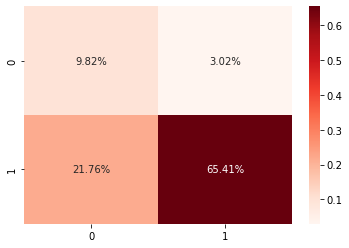

In [168]:
amazon_cmatrix = metrics.confusion_matrix(y_test2, predicting_on_old_model)
sns.heatmap((amazon_cmatrix/np.sum(amazon_cmatrix)), annot=True, 
            fmt='.2%', cmap='Reds')

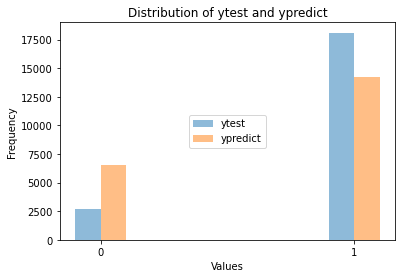

In [187]:
fig, ax = plt.subplots()
width = 0.4
ax.bar(np.array([0, 4])-width/2, [len(y_test2[y_test2==0]), len(y_test2[y_test2==4])], width=width, alpha=0.5, label='ytest')
ax.bar(np.array([0, 4])+width/2, [len(predicting_on_old_model[predicting_on_old_model==0]), len(predicting_on_old_model[predicting_on_old_model==4])], width=width, alpha=0.5, label='ypredict')
ax.legend(loc='center')

# add x-axis labels and title
ax.set_xticks([0, 4])
ax.set_xticklabels([0, 1])
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of ytest and ypredict')

# show the plot
plt.show()

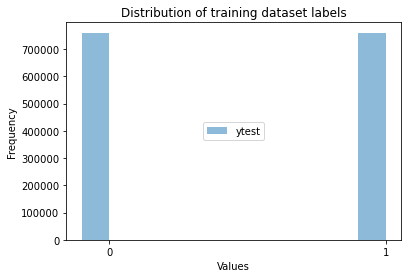

In [190]:
fig, ax = plt.subplots()
width = 0.4
ax.bar(np.array([0, 4])-width/2, [len(y_train[y_train==0]), len(y_train[y_train==4])], width=width, alpha=0.5, label='ytest')
ax.legend(loc='center')

# add x-axis labels and title
ax.set_xticks([0, 4])
ax.set_xticklabels([0, 1])
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of training dataset labels')

# show the plot
plt.show()